# Coindesk
### This code will open the Coindesk csv file, do cleaning activities such as removing punctuations, removing duplications etc. And visualize the data¶


In [1]:
import pandas as pd
import string
import os
import matplotlib.pyplot as plt

### Read the Coindesk.csv

In [4]:
dataset = pd.read_csv(r"Coindesk.csv")
dataset

,Tweet_ID,Time_of_Tweet,User_ID,Tweet_Text
0,1367565531176448003,2021-03-04 20:00:05,b'BTCticker',One Bitcoin now worth $48051.349. Market Cap $...
1,1367535327557152769,2021-03-04 18:00:04,b'BTCticker',One Bitcoin now worth $48431.181. Market Cap $...
2,1367505131349176321,2021-03-04 16:00:04,b'BTCticker',One Bitcoin now worth $49633.979. Market Cap $...
3,1367479922680164357,2021-03-04 14:19:54,b'MarkCrypto23',Larsen's attorneys said the SEC failed to show...
4,1367474933593473024,2021-03-04 14:00:05,b'BTCticker',One Bitcoin now worth $49576.571. Market Cap $...
...,...,...,...,...
187,1364817468267585536,2021-02-25 06:00:16,b'SasanSeyedi',- @elonmusk says #btc is too high - btc has a ...
188,1364817423342444545,2021-02-25 06:00:05,b'BTCticker',One Bitcoin now worth $50462.331. Market Cap $...
189,1364787220297773062,2021-02-25 04:00:04,b'BTCticker',One Bitcoin now worth $50244.679. Market Cap $...
190,1364757023326355458,2021-02-25 02:00:04,b'BTCticker',One Bitcoin now worth $50577.585. Market Cap $...


### Remove Punctuations

In [3]:
def remove_punctuation(dataset):
    no_punct="".join([c for c in dataset if c not in string.punctuation])
    return no_punct
dataset['Tweet_Text']=dataset['Tweet_Text'].apply(lambda x: remove_punctuation(x))
dataset['User_ID']=dataset['User_ID'].apply(lambda x: remove_punctuation(x))

dataset.head()

,Tweet_ID,Time_of_Tweet,User_ID,Tweet_Text
0,1367565531176448003,2021-03-04 20:00:05,bBTCticker,One Bitcoin now worth 48051349 Market Cap 8959...
1,1367535327557152769,2021-03-04 18:00:04,bBTCticker,One Bitcoin now worth 48431181 Market Cap 9029...
2,1367505131349176321,2021-03-04 16:00:04,bBTCticker,One Bitcoin now worth 49633979 Market Cap 9254...
3,1367479922680164357,2021-03-04 14:19:54,bMarkCrypto23,Larsens attorneys said the SEC failed to show ...
4,1367474933593473024,2021-03-04 14:00:05,bBTCticker,One Bitcoin now worth 49576571 Market Cap 9243...


### Remove Dupliacte tweets

In [6]:
dataset.shape

(192, 4)

In [7]:
dataset.Tweet_Text.duplicated().sum()

0

### This file does not contain any duplicate tweets, so no need of remove duplicate funtion

In [8]:
dataset.loc[dataset.Tweet_Text.duplicated(keep='first'),:]

,Tweet_ID,Time_of_Tweet,User_ID,Tweet_Text


### Remove Numbers from tweet texts

In [9]:
string.digits
def remove_digits(dataset):
    no_digits="".join([c for c in dataset if c not in string.digits])
    return no_digits
dataset['Tweet_Text']=dataset['Tweet_Text'].apply(lambda x: remove_digits(x))
dataset.head()

,Tweet_ID,Time_of_Tweet,User_ID,Tweet_Text
0,1367565531176448003,2021-03-04 20:00:05,bBTCticker,One Bitcoin now worth Market Cap Billion Bas...
1,1367535327557152769,2021-03-04 18:00:04,bBTCticker,One Bitcoin now worth Market Cap Billion Bas...
2,1367505131349176321,2021-03-04 16:00:04,bBTCticker,One Bitcoin now worth Market Cap Billion Bas...
3,1367479922680164357,2021-03-04 14:19:54,bMarkCrypto23,Larsens attorneys said the SEC failed to show ...
4,1367474933593473024,2021-03-04 14:00:05,bBTCticker,One Bitcoin now worth Market Cap Billion Bas...


### Remove words less than 2 letters

In [10]:
Tweet_body = dataset['Tweet_Text'].str.split()
def remove_smallwords(Tweet_body):
        txt_clean = ' '.join([word for word in Tweet_body if len(word)>1])
        return txt_clean
dataset['Tweet_Text'] = Tweet_body.apply(lambda x: remove_smallwords(x)) 
dataset.head()

,Tweet_ID,Time_of_Tweet,User_ID,Tweet_Text
0,1367565531176448003,2021-03-04 20:00:05,bBTCticker,One Bitcoin now worth Market Cap Billion Based...
1,1367535327557152769,2021-03-04 18:00:04,bBTCticker,One Bitcoin now worth Market Cap Billion Based...
2,1367505131349176321,2021-03-04 16:00:04,bBTCticker,One Bitcoin now worth Market Cap Billion Based...
3,1367479922680164357,2021-03-04 14:19:54,bMarkCrypto23,Larsens attorneys said the SEC failed to show ...
4,1367474933593473024,2021-03-04 14:00:05,bBTCticker,One Bitcoin now worth Market Cap Billion Based...


### Visualize number of tweets per day using a bar chart

In [5]:
day_1 =sum(dataset['Time_of_Tweet'].str.count('2021-03-04'))
day_2 =sum(dataset['Time_of_Tweet'].str.count('2021-03-03'))
day_3 =sum(dataset['Time_of_Tweet'].str.count('2021-03-02'))
day_4 =sum(dataset['Time_of_Tweet'].str.count('2021-03-01'))
day_5 =sum(dataset['Time_of_Tweet'].str.count('2021-02-28'))
day_6 =sum(dataset['Time_of_Tweet'].str.count('2021-02-27'))
day_7 =sum(dataset['Time_of_Tweet'].str.count('2021-02-26'))
day_8 =sum(dataset['Time_of_Tweet'].str.count('2021-02-25'))
tweets_per_day=day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8
tweets_per_day

(14, 25, 25, 17, 19, 27, 39, 26)

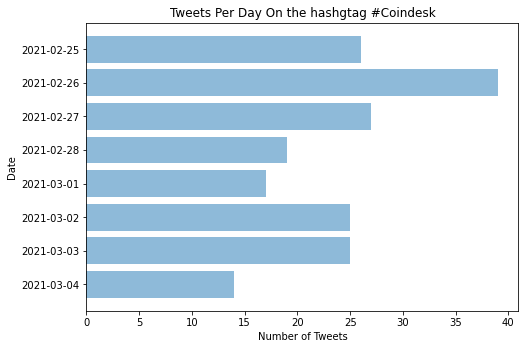

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = ['2021-03-04', '2021-03-03','2021-03-02','2021-03-01','2021-02-28','2021-02-27','2021-02-26','2021-02-25']
plt.barh(days, tweets_per_day, align='center', alpha=0.5)
plt.xlabel('Number of Tweets')
plt.ylabel('Date')
plt.title('Tweets Per Day On the hashgtag #Coindesk')
plt.show()